#Libraries

In [22]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from google.colab import drive

##Fot the tree

In [23]:
from sklearn.tree import export_graphviz
import pydot

##For collab

In [24]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Open the dataset

In [25]:
df = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/Tesi/Agrimonia_scaled_Bertonico.csv")
pd.set_option('display.max_columns', None)
df['Latitude'] = df['Latitude'].round(2)
df['Longitude'] = df['Longitude'].round(2)

df.head()

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print(df.dtypes)

Unnamed: 0                   int64
IDStations                 float64
Latitude                   float64
Longitude                  float64
Time                        object
Altitude                   float64
AQ_pm10                    float64
AQ_nh3                     float64
AQ_nox                     float64
AQ_no2                     float64
WE_temp_2m                 float64
WE_wind_speed_10m_mean     float64
WE_wind_speed_10m_max      float64
WE_tot_precipitation       float64
WE_precipitation_t         float64
WE_surface_pressure        float64
WE_solar_radiation         float64
WE_rh_min                  float64
WE_rh_mean                 float64
WE_rh_max                  float64
WE_wind_speed_100m_mean    float64
WE_wind_speed_100m_max     float64
WE_blh_layer_max           float64
WE_blh_layer_min           float64
EM_nh3_livestock_mm        float64
EM_nh3_agr_soils           float64
EM_nh3_agr_waste_burn      float64
EM_nh3_sum                 float64
EM_nox_traffic      

In [27]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [28]:
print(df.dtypes)

Unnamed: 0                   int64
IDStations                 float64
Latitude                   float64
Longitude                  float64
Time                        object
Altitude                   float64
AQ_pm10                    float64
AQ_nh3                     float64
AQ_nox                     float64
AQ_no2                     float64
WE_temp_2m                 float64
WE_wind_speed_10m_mean     float64
WE_wind_speed_10m_max      float64
WE_tot_precipitation       float64
WE_precipitation_t         float64
WE_surface_pressure        float64
WE_solar_radiation         float64
WE_rh_min                  float64
WE_rh_mean                 float64
WE_rh_max                  float64
WE_wind_speed_100m_mean    float64
WE_wind_speed_100m_max     float64
WE_blh_layer_max           float64
WE_blh_layer_min           float64
EM_nh3_livestock_mm        float64
EM_nh3_agr_soils           float64
EM_nh3_agr_waste_burn      float64
EM_nh3_sum                 float64
EM_nox_traffic      

#Select one station

In [29]:
df

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,6571,0.0,0.0,0.0,2021-12-27,0.0,0.416667,0.097705,0.504989,0.433487,0.200280,0.066863,0.034952,0.076162,0.166667,0.383430,0.072112,0.944562,0.990813,0.997876,0.068757,0.066517,0.045183,0.028677,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.979079,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2188,6572,0.0,0.0,0.0,2021-12-28,0.0,0.340278,0.087213,0.338163,0.375608,0.232286,0.136138,0.169427,0.005151,0.000000,0.364162,0.111576,0.876014,0.958498,0.995752,0.166408,0.248948,0.036404,0.039645,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.983264,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,6573,0.0,0.0,0.0,2021-12-29,0.0,0.222222,0.049836,0.291348,0.379753,0.223006,0.221694,0.249624,0.000417,0.000000,0.402697,0.125649,0.782994,0.903691,0.981657,0.310055,0.369211,0.027494,0.023071,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.0

In [30]:
mydf = df

mydf

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,6571,0.0,0.0,0.0,2021-12-27,0.0,0.416667,0.097705,0.504989,0.433487,0.200280,0.066863,0.034952,0.076162,0.166667,0.383430,0.072112,0.944562,0.990813,0.997876,0.068757,0.066517,0.045183,0.028677,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.979079,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2188,6572,0.0,0.0,0.0,2021-12-28,0.0,0.340278,0.087213,0.338163,0.375608,0.232286,0.136138,0.169427,0.005151,0.000000,0.364162,0.111576,0.876014,0.958498,0.995752,0.166408,0.248948,0.036404,0.039645,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.983264,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,6573,0.0,0.0,0.0,2021-12-29,0.0,0.222222,0.049836,0.291348,0.379753,0.223006,0.221694,0.249624,0.000417,0.000000,0.402697,0.125649,0.782994,0.903691,0.981657,0.310055,0.369211,0.027494,0.023071,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.0

In [31]:
print(mydf.isna().sum())

Unnamed: 0                 0
IDStations                 0
Latitude                   0
Longitude                  0
Time                       0
Altitude                   0
AQ_pm10                    0
AQ_nh3                     0
AQ_nox                     0
AQ_no2                     0
WE_temp_2m                 0
WE_wind_speed_10m_mean     0
WE_wind_speed_10m_max      0
WE_tot_precipitation       0
WE_precipitation_t         0
WE_surface_pressure        0
WE_solar_radiation         0
WE_rh_min                  0
WE_rh_mean                 0
WE_rh_max                  0
WE_wind_speed_100m_mean    0
WE_wind_speed_100m_max     0
WE_blh_layer_max           0
WE_blh_layer_min           0
EM_nh3_livestock_mm        0
EM_nh3_agr_soils           0
EM_nh3_agr_waste_burn      0
EM_nh3_sum                 0
EM_nox_traffic             0
EM_nox_sum                 0
EM_so2_sum                 0
LI_pigs                    0
LI_bovine                  0
LI_pigs_v2                 0
LI_bovine_v2  

## Remove NaN

In [32]:
mydf.dropna(inplace=True)
mydf

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,6571,0.0,0.0,0.0,2021-12-27,0.0,0.416667,0.097705,0.504989,0.433487,0.200280,0.066863,0.034952,0.076162,0.166667,0.383430,0.072112,0.944562,0.990813,0.997876,0.068757,0.066517,0.045183,0.028677,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.979079,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2188,6572,0.0,0.0,0.0,2021-12-28,0.0,0.340278,0.087213,0.338163,0.375608,0.232286,0.136138,0.169427,0.005151,0.000000,0.364162,0.111576,0.876014,0.958498,0.995752,0.166408,0.248948,0.036404,0.039645,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.983264,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,6573,0.0,0.0,0.0,2021-12-29,0.0,0.222222,0.049836,0.291348,0.379753,0.223006,0.221694,0.249624,0.000417,0.000000,0.402697,0.125649,0.782994,0.903691,0.981657,0.310055,0.369211,0.027494,0.023071,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.0

In [33]:
print(mydf.isna().sum())

Unnamed: 0                 0
IDStations                 0
Latitude                   0
Longitude                  0
Time                       0
Altitude                   0
AQ_pm10                    0
AQ_nh3                     0
AQ_nox                     0
AQ_no2                     0
WE_temp_2m                 0
WE_wind_speed_10m_mean     0
WE_wind_speed_10m_max      0
WE_tot_precipitation       0
WE_precipitation_t         0
WE_surface_pressure        0
WE_solar_radiation         0
WE_rh_min                  0
WE_rh_mean                 0
WE_rh_max                  0
WE_wind_speed_100m_mean    0
WE_wind_speed_100m_max     0
WE_blh_layer_max           0
WE_blh_layer_min           0
EM_nh3_livestock_mm        0
EM_nh3_agr_soils           0
EM_nh3_agr_waste_burn      0
EM_nh3_sum                 0
EM_nox_traffic             0
EM_nox_sum                 0
EM_so2_sum                 0
LI_pigs                    0
LI_bovine                  0
LI_pigs_v2                 0
LI_bovine_v2  

#Random forest model

In [34]:
y = mydf['AQ_pm10']
print(type(y))
print(y)

<class 'pandas.core.series.Series'>
0       0.361111
1       0.270833
2       0.180556
3       0.201389
4       0.236111
          ...   
2187    0.416667
2188    0.340278
2189    0.222222
2190    0.152778
2191    0.187500
Name: AQ_pm10, Length: 2192, dtype: float64


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Carica il tuo DataFrame mydf

# Rimuovi le righe con valori NaN
mydf = mydf.dropna()

# Divisione dei dati in set di addestramento, test e validazione
X = mydf.drop(['AQ_pm10', "Time"], axis=1)
y = mydf['AQ_pm10']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Creazione del modello Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Addestramento del modello
rf_model.fit(X_train, y_train)

# Valutazione delle prestazioni del modello
# Set di addestramento
y_pred_train = rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = math.sqrt(train_mse)

# Set di test
y_pred_test = rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = math.sqrt(test_mse)

# Set di validazione
y_pred_val = rf_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = math.sqrt(val_mse)

print('MAE sul set di addestramento:', train_mae)
print('MSE sul set di addestramento:', train_mse)
print('RMSE sul set di addestramento:', train_rmse)

print('MAE sul set di test:', test_mae)
print('MSE sul set di test:', test_mse)
print('RMSE sul set di test:', test_rmse)

print('MAE sul set di validazione:', val_mae)
print('MSE sul set di validazione:', val_mse)
print('RMSE sul set di validazione:', val_rmse)

# Variabili più significative
importances = rf_model.feature_importances_
variables = X.columns
important_variables = pd.DataFrame({'Variabile': variables, 'Importanza': importances})
important_variables = important_variables.sort_values('Importanza', ascending=False)
print(important_variables)


MAE sul set di addestramento: 0.019593442979176246
MSE sul set di addestramento: 0.00074585967766951
RMSE sul set di addestramento: 0.027310431663917546
MAE sul set di test: 0.051911282889628804
MSE sul set di test: 0.004718677344048922
RMSE sul set di test: 0.06869262947397575
MAE sul set di validazione: 0.05889259291908269
MSE sul set di validazione: 0.006162782767783439
RMSE sul set di validazione: 0.0785033933520293
                  Variabile  Importanza
7                    AQ_no2    0.256755
6                    AQ_nox    0.172606
5                    AQ_nh3    0.148658
24    EM_nh3_agr_waste_burn    0.038115
17                WE_rh_max    0.025042
20         WE_blh_layer_max    0.022266
16               WE_rh_mean    0.021061
19   WE_wind_speed_100m_max    0.020957
13      WE_surface_pressure    0.019554
8                WE_temp_2m    0.017318
21         WE_blh_layer_min    0.016734
15                WE_rh_min    0.016326
11     WE_tot_precipitation    0.016287
30              

# Feature importance based on feature permutation

In [36]:
# Feature importance based on feature permutation
importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Sorting the feature importance in descending order
indices = np.argsort(importance.importances_mean)[::-1]
important_variables = pd.DataFrame({'Variabile': X.columns[indices], 'Importanza': importance.importances_mean[indices]})
print(important_variables)


                  Variabile    Importanza
0                    AQ_nh3  3.423692e-01
1                    AQ_no2  1.537654e-01
2                    AQ_nox  9.108620e-02
3                 WE_rh_max  2.353252e-02
4                WE_rh_mean  2.065507e-02
5          WE_blh_layer_max  1.593558e-02
6     EM_nh3_agr_waste_burn  1.447385e-02
7                    LA_lvi  1.022743e-02
8                 WE_rh_min  8.918378e-03
9      WE_tot_precipitation  8.549822e-03
10                LI_bovine  6.522766e-03
11                   LA_hvi  5.810548e-03
12               Unnamed: 0  5.378410e-03
13      EM_nh3_livestock_mm  4.818336e-03
14      WE_surface_pressure  4.365902e-03
15               EM_so2_sum  4.195520e-03
16               EM_nh3_sum  3.923106e-03
17               WE_temp_2m  3.499644e-03
18               LI_pigs_v2  3.045354e-03
19               EM_nox_sum  2.612250e-03
20           wind_dir_10m_E  2.325360e-03
21             LI_bovine_v2  2.223472e-03
22   WE_wind_speed_10m_mean  2.221

#Print the tree

In [37]:
from sklearn.tree import export_text

tree = rf_model.estimators_[0]
tree_text = export_text(tree, feature_names=X.columns.tolist())
print(tree_text)

|--- AQ_nox <= 0.19
|   |--- AQ_nh3 <= 0.25
|   |   |--- AQ_no2 <= 0.18
|   |   |   |--- EM_nh3_agr_waste_burn <= 1.00
|   |   |   |   |--- WE_surface_pressure <= 0.33
|   |   |   |   |   |--- AQ_nox <= 0.09
|   |   |   |   |   |   |--- WE_wind_speed_100m_mean <= 0.36
|   |   |   |   |   |   |   |--- EM_nh3_agr_soils <= 0.60
|   |   |   |   |   |   |   |   |--- LI_pigs_v2 <= 0.81
|   |   |   |   |   |   |   |   |   |--- WE_wind_speed_100m_mean <= 0.32
|   |   |   |   |   |   |   |   |   |   |--- LI_bovine_v2 <= 0.37
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- LI_bovine_v2 >  0.37
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |   |   |   |   |--- WE_wind_speed_100m_mean >  0.32
|   |   |   |   |   |   |   |   |   |   |--- WE_blh_layer_max <= 0.30
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- WE_blh_

In [38]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import display, Image

tree = rf_model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

Output hidden; open in https://colab.research.google.com to view.

In [39]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)

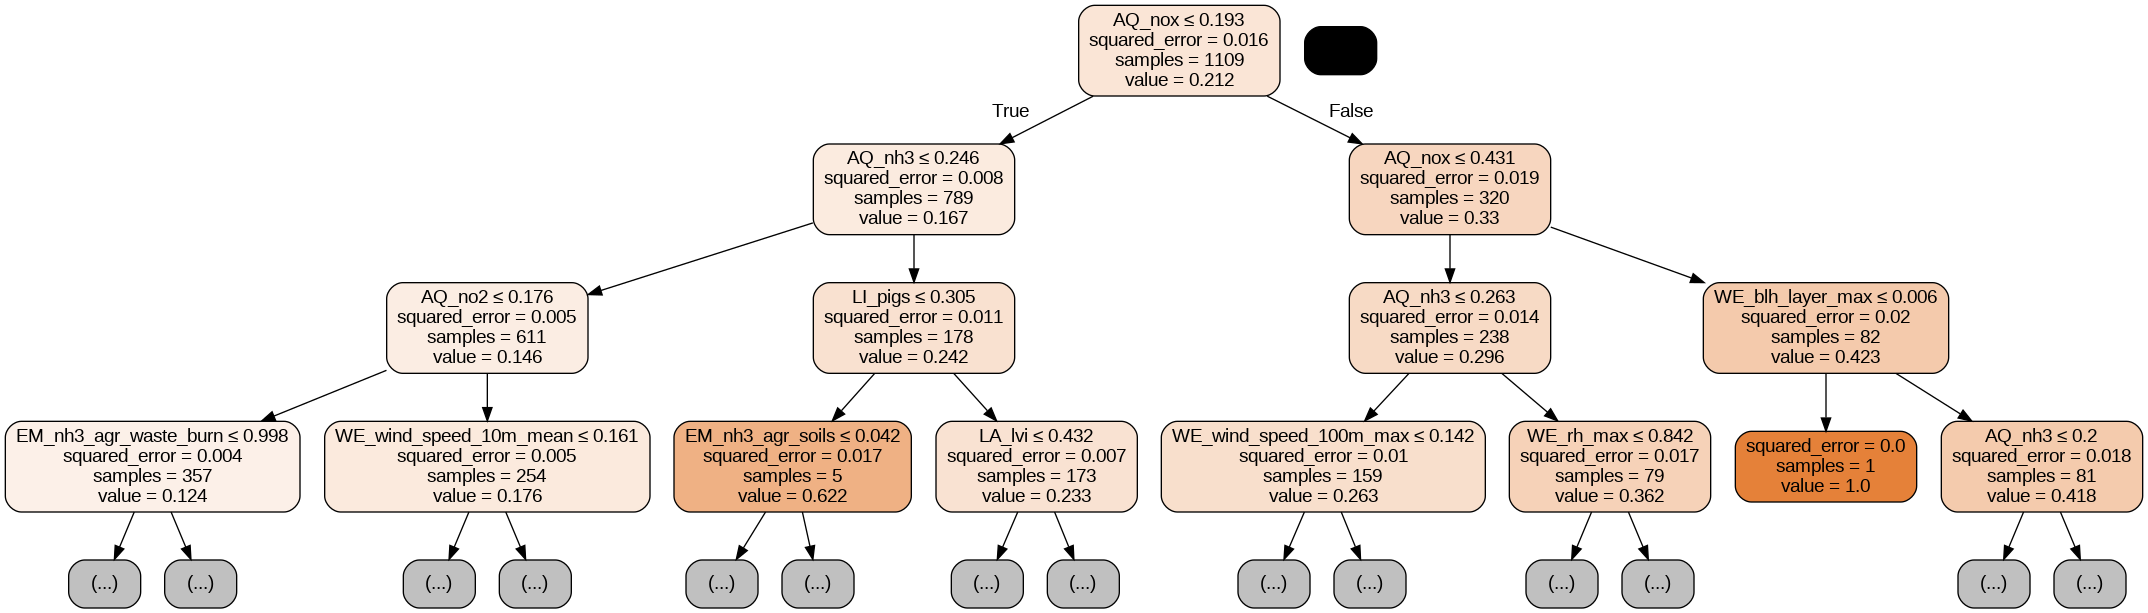

In [40]:

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))